# PDS09 Project 01 #
* Data Manipulation
* Handling Missing data
* Data Visualization

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
# Load the data

titanic_df = pd.read_csv('https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv')

titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [56]:
# feature names where Null values exist

null_columns = titanic_df.columns[titanic_df.isnull().any()]
# null_columns
print("Columns with Null values:", null_columns)

Columns with Null values: Index(['Age', 'Cabin', 'Embarked'], dtype='object')


In [57]:
# Filling missing values

titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('Unknown')

titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

<Axes: >

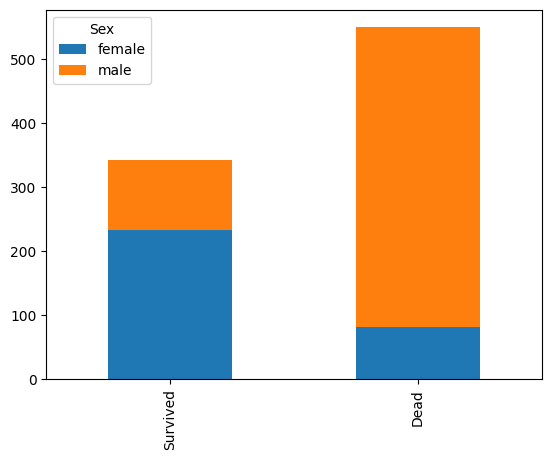

In [64]:
# Plotting the dataset using bar plot
survived = titanic_df[titanic_df['Survived'] == 1]['Sex'].value_counts()
dead = titanic_df[titanic_df['Survived'] == 0]['Sex'].value_counts()

df = pd.DataFrame([survived, dead], index=['Survived', 'Dead'])
df.plot(kind='bar', stacked=True, use_index=True)

In [59]:
# Creating AgeClass

def classify_age(age):
    if age <= 16:
        return 0
    elif age <= 26:
        return 1
    elif age <= 36:
        return 2
    elif age <= 62:
        return 3
    else:
        return 4
    
titanic_df['AgeClass'] = titanic_df['Age'].map(classify_age)

titanic_df.info()
titanic_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
 12  AgeClass     891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,2


In [60]:
# Dropping the Age column

titanic_df.drop(columns=['Age'], inplace=True)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,Unknown,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,Unknown,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,Unknown,S,2


<Axes: title={'center': 'Dead Count by AgeClass'}>

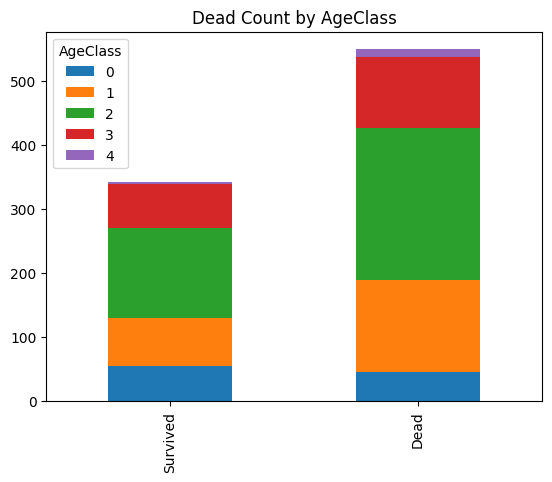

In [68]:
# Survived and Dead by AgeClass

survived_by_group = titanic_df[(titanic_df['Survived'] == 1)].groupby('AgeClass')['AgeClass'].value_counts()
dead_by_group = titanic_df[(titanic_df['Survived'] == 0)].groupby('AgeClass')['AgeClass'].value_counts()

#total for check
by_group = titanic_df.groupby(['AgeClass'])['AgeClass'].value_counts()

# print(survived_by_group)
# print(dead_by_group)
# print(by_group)

gr_df = pd.DataFrame([survived_by_group, dead_by_group], index=['Survived', 'Dead'])
gr_df.plot(kind='bar', stacked=True, title='Dead Count by AgeClass')